In [2]:
from fred_timeseries_toolkit.ts_toolkit import (
    fetch_series,
    resample_series,
    log_diff,
    check_stationahttp://localhost:8888/notebooks/AA%20Fred%20Time%20Series%20Toolkit/Timeseries%20test.ipynb#rity,
    check_stationarity_diff,
    quick_arima_forecast,
    quick_arima_forecast_testing,
    auto_arima_forecast,
    sarima_forecast,
    auto_sarima_forecast
)
from fredapi import Fred
import pandas as pd


# --- Setup FRED API Key ---
FRED_API_KEY = "Your_API_Key"
fred = Fred(api_key=FRED_API_KEY)



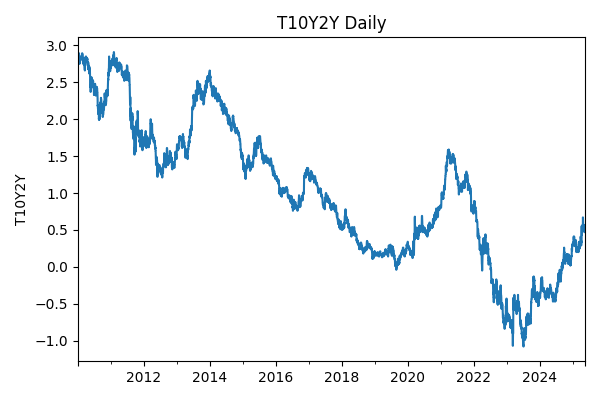

In [3]:
# Fetch the US GDP series
gdp_series = fetch_series('T10Y2Y', start_date='2010-01-01', api_key=FRED_API_KEY)

# Make sure the index is datetime
gdp_series.index = pd.to_datetime(gdp_series.index)

# Stationarity test of original GDP
gdp_stationarity_result = check_stationarity(
    gdp_series,
    resample_freq='D',
    resample_method='ffill',
    autolag='AIC',
)


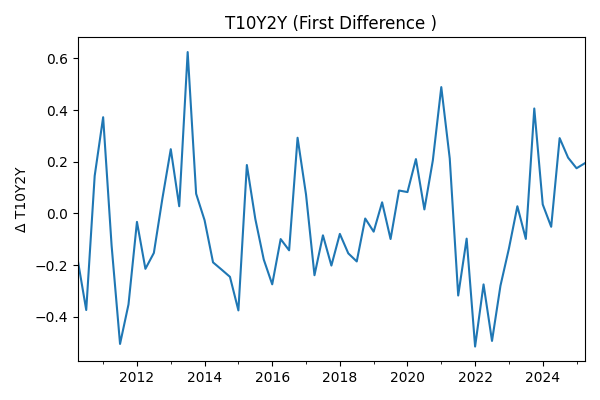

In [10]:
result2=check_stationarity_diff(gdp_series, autolag='AIC', resample_freq='QE')


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA(1,1,1) Fit Summary:
                               SARIMAX Results                                
Dep. Variable:                 T10Y2Y   No. Observations:                 3844
Model:                 ARIMA(1, 1, 1)   Log Likelihood                7058.474
Date:                Thu, 15 May 2025   AIC                         -14110.947
Time:                        12:56:35   BIC                         -14092.185
Sample:                             0   HQIC                        -14104.283
                               - 3844                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6769      0.148     -4.580      0.000      -0.967      -0.387
ma.L1          0.6429      0.155      4.154      0.000       0.340       0.946
sigma2         0.0015   1.

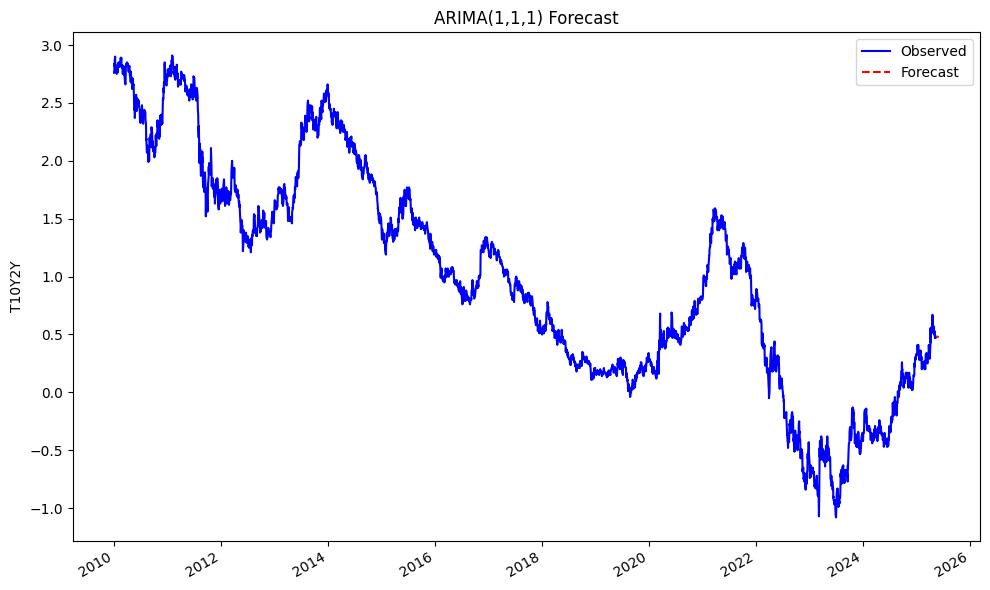

{'model_fit': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x1394a6d2290>,
 'forecast': 2025-05-15    0.480122
 2025-05-16    0.480040
 2025-05-17    0.480096
 2025-05-18    0.480058
 2025-05-19    0.480083
 2025-05-20    0.480066
 2025-05-21    0.480078
 2025-05-22    0.480070
 2025-05-23    0.480075
 2025-05-24    0.480071
 2025-05-25    0.480074
 2025-05-26    0.480072
 2025-05-27    0.480073
 2025-05-28    0.480073
 2025-05-29    0.480073
 2025-05-30    0.480073
 2025-05-31    0.480073
 2025-06-01    0.480073
 2025-06-02    0.480073
 2025-06-03    0.480073
 Freq: D, Name: predicted_mean, dtype: float64,
 'aic': np.float64(-14110.947286241184),
 'bic': np.float64(-14092.185260469489)}

In [5]:
quick_arima_forecast(gdp_series, ar_order=1, diff_order=1, ma_order=1, forecast_steps=20)


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


ARIMA(2,1,2) Fit Summary:
                               SARIMAX Results                                
Dep. Variable:                 T10Y2Y   No. Observations:                 3075
Model:                 ARIMA(2, 1, 2)   Log Likelihood                5884.280
Date:                Thu, 15 May 2025   AIC                         -11758.559
Time:                        12:56:41   BIC                         -11728.406
Sample:                             0   HQIC                        -11747.727
                               - 3075                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0296      0.030      0.993      0.321      -0.029       0.088
ar.L2          0.9702      0.030     32.515      0.000       0.912       1.029
ma.L1         -0.0377     

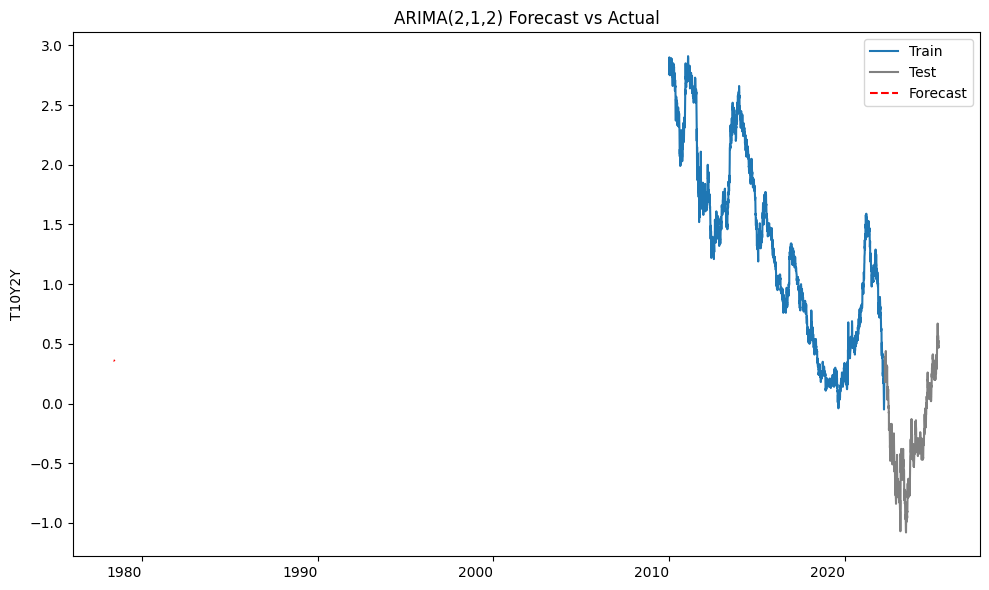

{'model_fit': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x1394a74cc10>,
 'forecast': 3075    0.358431
 3076    0.358977
 3077    0.357471
 3078    0.357957
 3079    0.356510
 Name: predicted_mean, dtype: float64,
 'aic': np.float64(-11758.559342447972),
 'bic': np.float64(-11728.40566782748),
 'rmse': nan}

In [6]:
quick_arima_forecast_testing(gdp_series, ar_order=2, diff_order=1, ma_order=2, forecast_steps=5)


 Accepted ARIMA(0,0,0) - BIC: 10658.06
 Accepted ARIMA(0,0,1) - BIC: 5591.17
 Rejected ARIMA(0,0,2) due to instability.
 Rejected ARIMA(0,0,3) due to instability.
 Rejected ARIMA(0,0,4) due to instability.
 Rejected ARIMA(0,0,5) due to instability.
 Accepted ARIMA(0,1,0) - BIC: -14100.64
 Accepted ARIMA(0,1,1) - BIC: -14097.06
 Accepted ARIMA(0,1,2) - BIC: -14089.05
 Accepted ARIMA(0,1,3) - BIC: -14091.61
 Accepted ARIMA(0,1,4) - BIC: -14089.02
 Accepted ARIMA(0,1,5) - BIC: -14087.69
 Accepted ARIMA(0,2,0) - BIC: -11300.16
 Rejected ARIMA(0,2,1) due to instability.
 Rejected ARIMA(0,2,2) due to instability.
 Rejected ARIMA(0,2,3) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(0,2,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(0,2,5) due to instability.
 Rejected ARIMA(1,0,0) due to instability.
 Rejected ARIMA(1,0,1) due to instability.
 Rejected ARIMA(1,0,2) due to instability.
 Rejected ARIMA(1,0,3) due to instability.
 Rejected ARIMA(1,0,4) due to instability.
 Rejected ARIMA(1,0,5) due to instability.
 Accepted ARIMA(1,1,0) - BIC: -14097.14
 Accepted ARIMA(1,1,1) - BIC: -14092.19
 Accepted ARIMA(1,1,2) - BIC: -14087.93
 Accepted ARIMA(1,1,3) - BIC: -14091.61
 Accepted ARIMA(1,1,4) - BIC: -14084.36
 Accepted ARIMA(1,1,5) - BIC: -14079.44
 Accepted ARIMA(1,2,0) - BIC: -12516.97


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 Rejected ARIMA(1,2,1) due to instability.
 Rejected ARIMA(1,2,2) due to instability.
 Accepted ARIMA(1,2,3) - BIC: -14065.16
 Accepted ARIMA(1,2,4) - BIC: -14056.95


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(1,2,5) - BIC: -14056.28
 Accepted ARIMA(2,0,0) - BIC: -14077.58
 Accepted ARIMA(2,0,1) - BIC: -14073.64
 Rejected ARIMA(2,0,2) due to instability.
 Rejected ARIMA(2,0,3) due to instability.
 Rejected ARIMA(2,0,4) due to instability.
 Accepted ARIMA(2,0,5) - BIC: -14060.58


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(2,1,0) - BIC: -14089.28


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(2,1,1) - BIC: -14085.72


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(2,1,2) - BIC: -14084.68
 Accepted ARIMA(2,1,3) - BIC: -14082.90


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(2,1,4) - BIC: -14075.63
 Accepted ARIMA(2,1,5) - BIC: -14071.12
 Accepted ARIMA(2,2,0) - BIC: -12878.80


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 Rejected ARIMA(2,2,1) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(2,2,2) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(2,2,3) due to instability.
 Rejected ARIMA(2,2,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(2,2,5) - BIC: -14035.29
 Accepted ARIMA(3,0,0) - BIC: -14069.62
 Accepted ARIMA(3,0,1) - BIC: -14065.42


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(3,0,2) due to instability.
 Rejected ARIMA(3,0,3) due to instability.
 Rejected ARIMA(3,0,4) due to instability.
 Rejected ARIMA(3,0,5) due to instability.
 Accepted ARIMA(3,1,0) - BIC: -14090.75


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(3,1,1) - BIC: -14092.76


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(3,1,2) - BIC: -14084.74
 Accepted ARIMA(3,1,3) - BIC: -14079.14
 Accepted ARIMA(3,1,4) - BIC: -14072.55
 Accepted ARIMA(3,1,5) - BIC: -14062.75
 Accepted ARIMA(3,2,0) - BIC: -13103.96


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


 Rejected ARIMA(3,2,1) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(3,2,2) due to instability.
 Rejected ARIMA(3,2,3) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(3,2,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(3,2,5) due to instability.
 Accepted ARIMA(4,0,0) - BIC: -14070.87
 Accepted ARIMA(4,0,1) - BIC: -14059.25


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(4,0,2) due to instability.
 Rejected ARIMA(4,0,3) due to instability.
 Rejected ARIMA(4,0,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(4,0,5) due to instability.
 Accepted ARIMA(4,1,0) - BIC: -14088.36


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(4,1,1) - BIC: -14080.38


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(4,1,2) - BIC: -14076.34
 Accepted ARIMA(4,1,3) - BIC: -14072.08


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(4,1,4) - BIC: -14064.95
 Accepted ARIMA(4,1,5) - BIC: -14055.62
 Accepted ARIMA(4,2,0) - BIC: -13237.44


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(4,2,1) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(4,2,2) due to instability.
 Rejected ARIMA(4,2,3) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(4,2,4) due to instability.
 Accepted ARIMA(4,2,5) - BIC: -14015.68
 Accepted ARIMA(5,0,0) - BIC: -14068.16
 Accepted ARIMA(5,0,1) - BIC: -14056.25
 Rejected ARIMA(5,0,2) due to instability.
 Rejected ARIMA(5,0,3) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(5,0,4) due to instability.
 Accepted ARIMA(5,0,5) - BIC: -14042.25
 Accepted ARIMA(5,1,0) - BIC: -14088.67


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(5,1,1) - BIC: -14080.43


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(5,1,2) - BIC: -14072.18
 Accepted ARIMA(5,1,3) - BIC: -14063.92


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Accepted ARIMA(5,1,4) - BIC: -14056.27


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(5,1,5) - BIC: -14048.27
 Accepted ARIMA(5,2,0) - BIC: -13381.88


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


 Rejected ARIMA(5,2,1) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(5,2,2) - BIC: -14044.15


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(5,2,3) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected ARIMA(5,2,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted ARIMA(5,2,5) - BIC: -14010.87

 Best ARIMA(0, 1, 0) selected based on BIC.
                               SARIMAX Results                                
Dep. Variable:                 T10Y2Y   No. Observations:                 3844
Model:                 ARIMA(0, 1, 0)   Log Likelihood                7054.449
Date:                Thu, 15 May 2025   AIC                         -14106.898
Time:                        13:07:03   BIC                         -14100.644
Sample:                             0   HQIC                        -14104.676
                               - 3844                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0015   1.81e-05     82.074      0.000       0.001       0.002
Ljung-Box (L1) (Q):                   4.82   J

C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


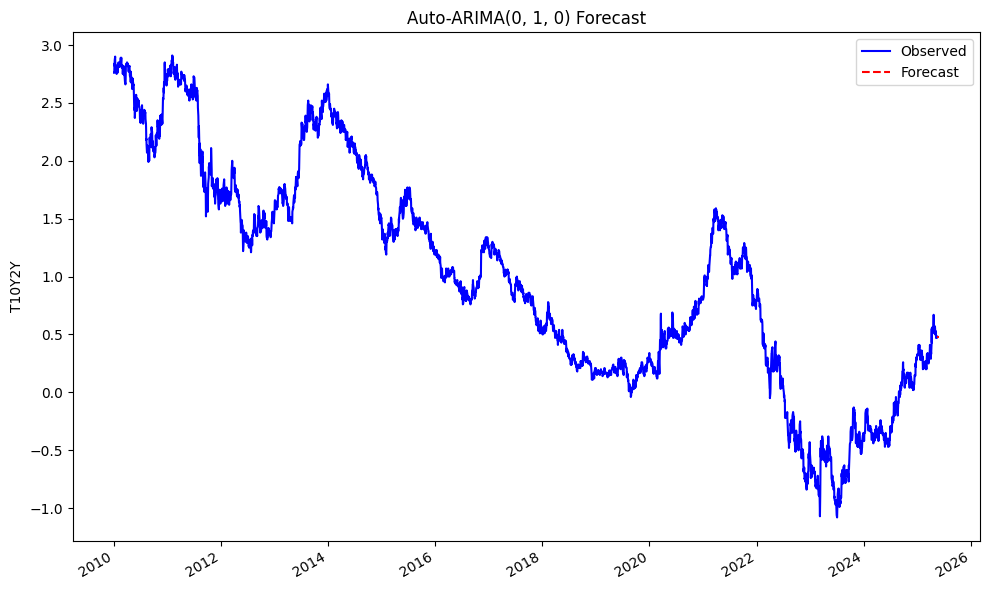

{'best_model_fit': <statsmodels.tsa.arima.model.ARIMAResultsWrapper at 0x13937987280>,
 'best_order': (0, 1, 0),
 'forecast': 2025-05-15    0.48
 2025-05-16    0.48
 2025-05-17    0.48
 2025-05-18    0.48
 2025-05-19    0.48
 2025-05-20    0.48
 2025-05-21    0.48
 2025-05-22    0.48
 2025-05-23    0.48
 2025-05-24    0.48
 2025-05-25    0.48
 2025-05-26    0.48
 Freq: D, Name: predicted_mean, dtype: float64,
 'aic': np.float64(-14106.897656585817),
 'bic': np.float64(-14100.643647995252)}

In [7]:
auto_arima_forecast(gdp_series, p_range=(0,5), d_range=(0,2), q_range=(0,5), ic='bic', forecast_steps=12)


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(



 SARIMA(1, 1, 1)x(1, 1, 1, 4) Fit Summary:
                                     SARIMAX Results                                     
Dep. Variable:                            T10Y2Y   No. Observations:                 3844
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                7033.578
Date:                           Thu, 15 May 2025   AIC                         -14057.157
Time:                                   13:07:14   BIC                         -14025.900
Sample:                                        0   HQIC                        -14046.053
                                          - 3844                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8010      0.077    -10.396      0.000      -0.952      -0.650

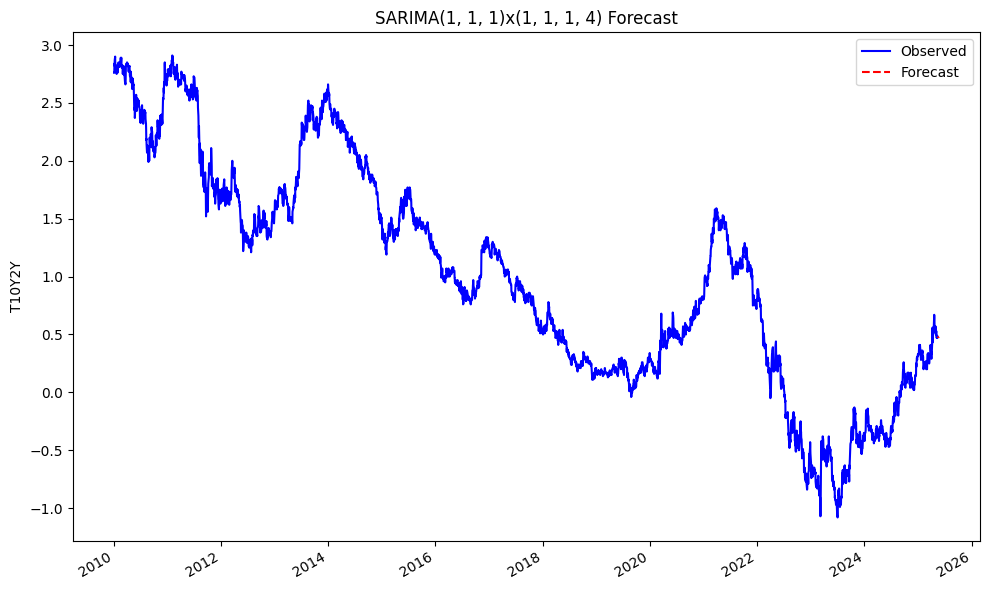

{'model_fit': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x13937966a40>,
 'forecast': 2025-05-15    0.479579
 2025-05-16    0.478244
 2025-05-17    0.477829
 2025-05-18    0.479986
 2025-05-19    0.480385
 2025-05-20    0.478256
 2025-05-21    0.477610
 2025-05-22    0.480440
 Freq: D, Name: predicted_mean, dtype: float64,
 'aic': np.float64(-14057.156731445939),
 'bic': np.float64(-14025.899716119036)}

In [8]:
sarima_forecast(gdp_series, order=(1,1,1), seasonal_order=(1,1,1,4), forecast_steps=8)


 Accepted SARIMA(0,0,0)x(0,0,0,4) - BIC: 13462.71
 Rejected SARIMA(0,0,0)x(0,0,1,4) due to instability.
 Accepted SARIMA(0,0,0)x(0,1,0,4) - BIC: -9029.98


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted SARIMA(0,0,0)x(0,1,1,4) - BIC: -9062.96
 Rejected SARIMA(0,0,0)x(1,0,0,4) due to instability.
 Rejected SARIMA(0,0,0)x(1,0,1,4) due to instability.
 Accepted SARIMA(0,0,0)x(1,1,0,4) - BIC: -9067.26
 Accepted SARIMA(0,0,0)x(1,1,1,4) - BIC: -9055.95
 Rejected SARIMA(0,0,1)x(0,0,0,4) due to instability.
 Accepted SARIMA(0,0,1)x(0,0,1,4) - BIC: 3421.19
 Accepted SARIMA(0,0,1)x(0,1,0,4) - BIC: -11440.76
 Accepted SARIMA(0,0,1)x(0,1,1,4) - BIC: -11548.90
 Rejected SARIMA(0,0,1)x(1,0,0,4) due to instability.
 Rejected SARIMA(0,0,1)x(1,0,1,4) due to instability.
 Accepted SARIMA(0,0,1)x(1,1,0,4) - BIC: -11531.57
 Accepted SARIMA(0,0,1)x(1,1,1,4) - BIC: -11549.30
 Rejected SARIMA(0,0,2)x(0,0,0,4) due to instability.
 Rejected SARIMA(0,0,2)x(0,0,1,4) due to instability.
 Accepted SARIMA(0,0,2)x(0,1,0,4) - BIC: -11507.77
 Accepted SARIMA(0,0,2)x(0,1,1,4) - BIC: -12044.78
 Rejected SARIMA(0,0,2)x(1,0,0,4) due to instability.
 Rejected SARIMA(0,0,2)x(1,0,1,4) due to instability.
 Accepted

C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted SARIMA(0,1,0)x(0,0,1,4) - BIC: -14080.31
 Accepted SARIMA(0,1,0)x(0,1,0,4) - BIC: -11287.50
 Rejected SARIMA(0,1,0)x(0,1,1,4) due to instability.
 Accepted SARIMA(0,1,0)x(1,0,0,4) - BIC: -14084.74
 Accepted SARIMA(0,1,0)x(1,0,1,4) - BIC: -14071.78
 Accepted SARIMA(0,1,0)x(1,1,0,4) - BIC: -12479.72
 Rejected SARIMA(0,1,0)x(1,1,1,4) due to instability.
 Accepted SARIMA(0,1,1)x(0,0,0,4) - BIC: -14092.02
 Accepted SARIMA(0,1,1)x(0,0,1,4) - BIC: -14077.09
 Accepted SARIMA(0,1,1)x(0,1,0,4) - BIC: -11284.26
 Rejected SARIMA(0,1,1)x(0,1,1,4) due to instability.
 Accepted SARIMA(0,1,1)x(1,0,0,4) - BIC: -14082.14
 Accepted SARIMA(0,1,1)x(1,0,1,4) - BIC: -14068.76
 Accepted SARIMA(0,1,1)x(1,1,0,4) - BIC: -12474.54
 Rejected SARIMA(0,1,1)x(1,1,1,4) due to instability.
 Accepted SARIMA(0,1,2)x(0,0,0,4) - BIC: -14079.50
 Accepted SARIMA(0,1,2)x(0,0,1,4) - BIC: -14064.53
 Rejected SARIMA(0,1,2)x(0,1,0,4) due to instability.
 Rejected SARIMA(0,1,2)x(0,1,1,4) due to instability.
 Accepted SAR

C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(1,0,1)x(1,0,1,4) due to instability.
 Accepted SARIMA(1,0,1)x(1,1,0,4) - BIC: -12835.75
 Rejected SARIMA(1,0,1)x(1,1,1,4) due to instability.
 Rejected SARIMA(1,0,2)x(0,0,0,4) due to instability.
 Rejected SARIMA(1,0,2)x(0,0,1,4) due to instability.
 Rejected SARIMA(1,0,2)x(0,1,0,4) due to instability.
 Rejected SARIMA(1,0,2)x(0,1,1,4) due to instability.
 Rejected SARIMA(1,0,2)x(1,0,0,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(1,0,2)x(1,0,1,4) due to instability.
 Accepted SARIMA(1,0,2)x(1,1,0,4) - BIC: -12875.57


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(1,0,2)x(1,1,1,4) due to instability.
 Accepted SARIMA(1,1,0)x(0,0,0,4) - BIC: -14092.47
 Accepted SARIMA(1,1,0)x(0,0,1,4) - BIC: -14077.70
 Accepted SARIMA(1,1,0)x(0,1,0,4) - BIC: -11279.86
 Rejected SARIMA(1,1,0)x(0,1,1,4) due to instability.
 Accepted SARIMA(1,1,0)x(1,0,0,4) - BIC: -14078.08
 Accepted SARIMA(1,1,0)x(1,0,1,4) - BIC: -14071.24
 Accepted SARIMA(1,1,0)x(1,1,0,4) - BIC: -12470.57
 Rejected SARIMA(1,1,0)x(1,1,1,4) due to instability.
 Accepted SARIMA(1,1,1)x(0,0,0,4) - BIC: -14086.94
 Accepted SARIMA(1,1,1)x(0,0,1,4) - BIC: -14076.89
 Rejected SARIMA(1,1,1)x(0,1,0,4) due to instability.
 Rejected SARIMA(1,1,1)x(0,1,1,4) due to instability.
 Accepted SARIMA(1,1,1)x(1,0,0,4) - BIC: -14080.10
 Accepted SARIMA(1,1,1)x(1,0,1,4) - BIC: -14068.70
 Accepted SARIMA(1,1,1)x(1,1,0,4) - BIC: -12462.39
 Rejected SARIMA(1,1,1)x(1,1,1,4) due to instability.
 Accepted SARIMA(1,1,2)x(0,0,0,4) - BIC: -14078.07
 Accepted SARIMA(1,1,2)x(0,0,1,4) - BIC: -14059.82
 Accepted SAR

C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(1,1,2)x(1,1,1,4) due to instability.
 Accepted SARIMA(2,0,0)x(0,0,0,4) - BIC: -14088.13
 Accepted SARIMA(2,0,0)x(0,0,1,4) - BIC: -14077.89
 Accepted SARIMA(2,0,0)x(0,1,0,4) - BIC: -11966.76
 Rejected SARIMA(2,0,0)x(0,1,1,4) due to instability.
 Rejected SARIMA(2,0,0)x(1,0,0,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(2,0,0)x(1,0,1,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted SARIMA(2,0,0)x(1,1,0,4) - BIC: -12835.70
 Rejected SARIMA(2,0,0)x(1,1,1,4) due to instability.
 Accepted SARIMA(2,0,1)x(0,0,0,4) - BIC: -14081.37
 Accepted SARIMA(2,0,1)x(0,0,1,4) - BIC: -14068.48
 Rejected SARIMA(2,0,1)x(0,1,0,4) due to instability.
 Rejected SARIMA(2,0,1)x(0,1,1,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted SARIMA(2,0,1)x(1,0,0,4) - BIC: -14069.89


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Accepted SARIMA(2,0,1)x(1,0,1,4) - BIC: -14062.40
 Rejected SARIMA(2,0,1)x(1,1,0,4) due to instability.
 Rejected SARIMA(2,0,1)x(1,1,1,4) due to instability.
 Rejected SARIMA(2,0,2)x(0,0,0,4) due to instability.
 Rejected SARIMA(2,0,2)x(0,0,1,4) due to instability.
 Rejected SARIMA(2,0,2)x(0,1,0,4) due to instability.
 Rejected SARIMA(2,0,2)x(0,1,1,4) due to instability.
 Rejected SARIMA(2,0,2)x(1,0,0,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(2,0,2)x(1,0,1,4) due to instability.
 Rejected SARIMA(2,0,2)x(1,1,0,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(2,0,2)x(1,1,1,4) due to instability.
 Accepted SARIMA(2,1,0)x(0,0,0,4) - BIC: -14084.24
 Accepted SARIMA(2,1,0)x(0,0,1,4) - BIC: -14069.82
 Accepted SARIMA(2,1,0)x(0,1,0,4) - BIC: -11276.08
 Rejected SARIMA(2,1,0)x(0,1,1,4) due to instability.
 Accepted SARIMA(2,1,0)x(1,0,0,4) - BIC: -14069.48
 Accepted SARIMA(2,1,0)x(1,0,1,4) - BIC: -14061.10
 Accepted SARIMA(2,1,0)x(1,1,0,4) - BIC: -12458.21
 Rejected SARIMA(2,1,0)x(1,1,1,4) due to instability.
 Rejected SARIMA(2,1,1)x(0,0,0,4) due to instability.
 Rejected SARIMA(2,1,1)x(0,0,1,4) due to instability.
 Rejected SARIMA(2,1,1)x(0,1,0,4) due to instability.
 Rejected SARIMA(2,1,1)x(0,1,1,4) due to instability.
 Rejected SARIMA(2,1,1)x(1,0,0,4) due to instability.
 Rejected SARIMA(2,1,1)x(1,0,1,4) due to instability.
 Rejected SARIMA(2,1,1)x(1,1,0,4) due to instability.


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(2,1,1)x(1,1,1,4) due to instability.
 Accepted SARIMA(2,1,2)x(0,0,0,4) - BIC: -14071.79
 Accepted SARIMA(2,1,2)x(0,0,1,4) - BIC: -14055.61
 Rejected SARIMA(2,1,2)x(0,1,0,4) due to instability.
 Rejected SARIMA(2,1,2)x(0,1,1,4) due to instability.
 Accepted SARIMA(2,1,2)x(1,0,0,4) - BIC: -14060.23
 Accepted SARIMA(2,1,2)x(1,0,1,4) - BIC: -14047.38


C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


 Rejected SARIMA(2,1,2)x(1,1,0,4) due to instability.
 Rejected SARIMA(2,1,2)x(1,1,1,4) due to instability.

 Best SARIMA(0, 1, 0)x(0, 0, 0, 4) selected based on BIC.
                               SARIMAX Results                                
Dep. Variable:                 T10Y2Y   No. Observations:                 3844
Model:               SARIMAX(0, 1, 0)   Log Likelihood                7052.113
Date:                Thu, 15 May 2025   AIC                         -14102.226
Time:                        13:18:59   BIC                         -14095.973
Sample:                             0   HQIC                        -14100.005
                               - 3844                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0015   1.82e-05     82.050

C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\roryq\anaconda3\envs\v4f\lib\site-packages\fred_timeseries_toolkit\ts_toolkit.py:800: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  forecast_index = pd.date_range(start=series.index[-1], periods=forecast_steps+1, freq=freq_used)[1:]


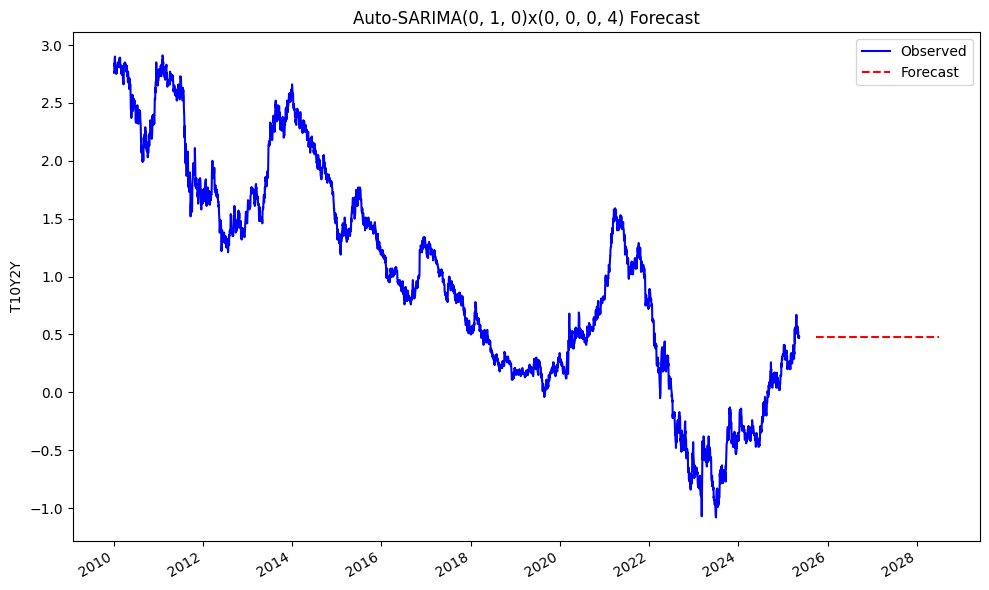

{'best_model_fit': <statsmodels.tsa.statespace.sarimax.SARIMAXResultsWrapper at 0x1394a8b2110>,
 'best_order': (0, 1, 0),
 'best_seasonal_order': (0, 0, 0, 4),
 'forecast': 2025-09-30    0.48
 2025-12-31    0.48
 2026-03-31    0.48
 2026-06-30    0.48
 2026-09-30    0.48
 2026-12-31    0.48
 2027-03-31    0.48
 2027-06-30    0.48
 2027-09-30    0.48
 2027-12-31    0.48
 2028-03-31    0.48
 2028-06-30    0.48
 Freq: QE-DEC, Name: predicted_mean, dtype: float64,
 'aic': np.float64(-14102.226476633838),
 'bic': np.float64(-14095.97272829051)}

In [9]:
auto_sarima_forecast(gdp_series,
                               p_range=(0,2), d_range=(0,1), q_range=(0,2),
                               P_range=(0,1), D_range=(0,1), Q_range=(0,1),
                               s=4, forecast_steps=12, freq='Q', ic='bic')